In [1]:
import numpy as np
import pandas as pd

EPOCHS = 100

targets = ['_5HT2A', 'AChE', 'D2R', 'D3R', 'MAOB']
num = [1000, 2000, 5000]

dataframes = {
    target: pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{target}.csv')
    for target in targets
}

dataframes["Unconditional"] = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/Unconditional.csv')

for target in dataframes:
    df = dataframes[target]
    col_preds = df.columns[1]

    count_invalid = len(df[df[col_preds].isna()])
    print(f"{target}: {count_invalid}")

    # Drop invalid smiles rows
    dataframes[target] = df.dropna(subset=[col_preds]).copy()
    # Set dtype as float for every column except SMILES
    for col in df.columns:
        if col != 'SMILES':
            dataframes[target][col] = dataframes[target][col].astype(float)

    print(dataframes[target].shape)

_5HT2A: 3819
(26181, 7)
AChE: 5230
(24770, 7)
D2R: 3424
(26576, 11)
D3R: 3421
(26579, 7)
MAOB: 3072
(26928, 7)
Unconditional: 3424
(26576, 17)


In [2]:
import numpy as np
import pandas as pd

EPOCHS = 100

targets = ['_5HT2A', 'AChE', 'D2R', 'D3R', 'MAOB']
num = [1000, 2000, 5000]

dataframes = {
    target: pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{target}.csv')
    for target in targets
}

dataframes["Unconditional"] = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/Unconditional.csv')

for target in dataframes:
    df = dataframes[target]
    col_preds = df.columns[1]

    count_invalid = len(df[df[col_preds].isna()])
    print(f"{target}: {count_invalid}")

    # Drop invalid smiles rows
    dataframes[target] = df.dropna(subset=[col_preds]).copy()
    # Set dtype as float for every column except SMILES
    for col in df.columns:
        if col != 'SMILES':
            dataframes[target][col] = dataframes[target][col].astype(float)

    print(dataframes[target].shape)

_5HT2A: 3819
(26181, 7)
AChE: 5230
(24770, 7)
D2R: 3424
(26576, 11)
D3R: 3421
(26579, 7)
MAOB: 3072
(26928, 7)
Unconditional: 3424
(26576, 17)


In [3]:
aggs = ["SUM", "MEAN", "MAX"]
# aggs = ["MEAN", "MAX"]
# aggs = ["SUM"]

multi_targets = list()

for agg in aggs:
    multi_targets.extend([
        f"AChE_MAOB_{agg}",
        f"D2R__5HT2A_{agg}",
        f"D2R_D3R_{agg}"
    ])

dataframes_mt = {
    targets: pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{targets}.csv')
    for targets in multi_targets
}

for mts in dataframes_mt:
    df = dataframes_mt[mts]

    col_preds = df.columns[1]

    count_invalid = len(df[df[col_preds].isna()])
    print(f"{mts}: {count_invalid}")

    # Drop invalid smiles rows
    dataframes_mt[mts] = df.dropna(subset=[col_preds]).copy()
    # Set dtype as float for every column except SMILES
    for col in df.columns:
        if col != 'SMILES':
            dataframes_mt[mts][col] = dataframes_mt[mts][col].astype(float)
    
    print(dataframes_mt[mts].shape)

AChE_MAOB_SUM: 5193
(24807, 7)
D2R__5HT2A_SUM: 4125
(25875, 7)
D2R_D3R_SUM: 3744
(26256, 7)
AChE_MAOB_MEAN: 3930
(26070, 7)
D2R__5HT2A_MEAN: 3473
(26527, 7)
D2R_D3R_MEAN: 3425
(26575, 7)
AChE_MAOB_MAX: 3949
(26051, 7)
D2R__5HT2A_MAX: 3578
(26422, 7)
D2R_D3R_MAX: 3535
(26465, 7)


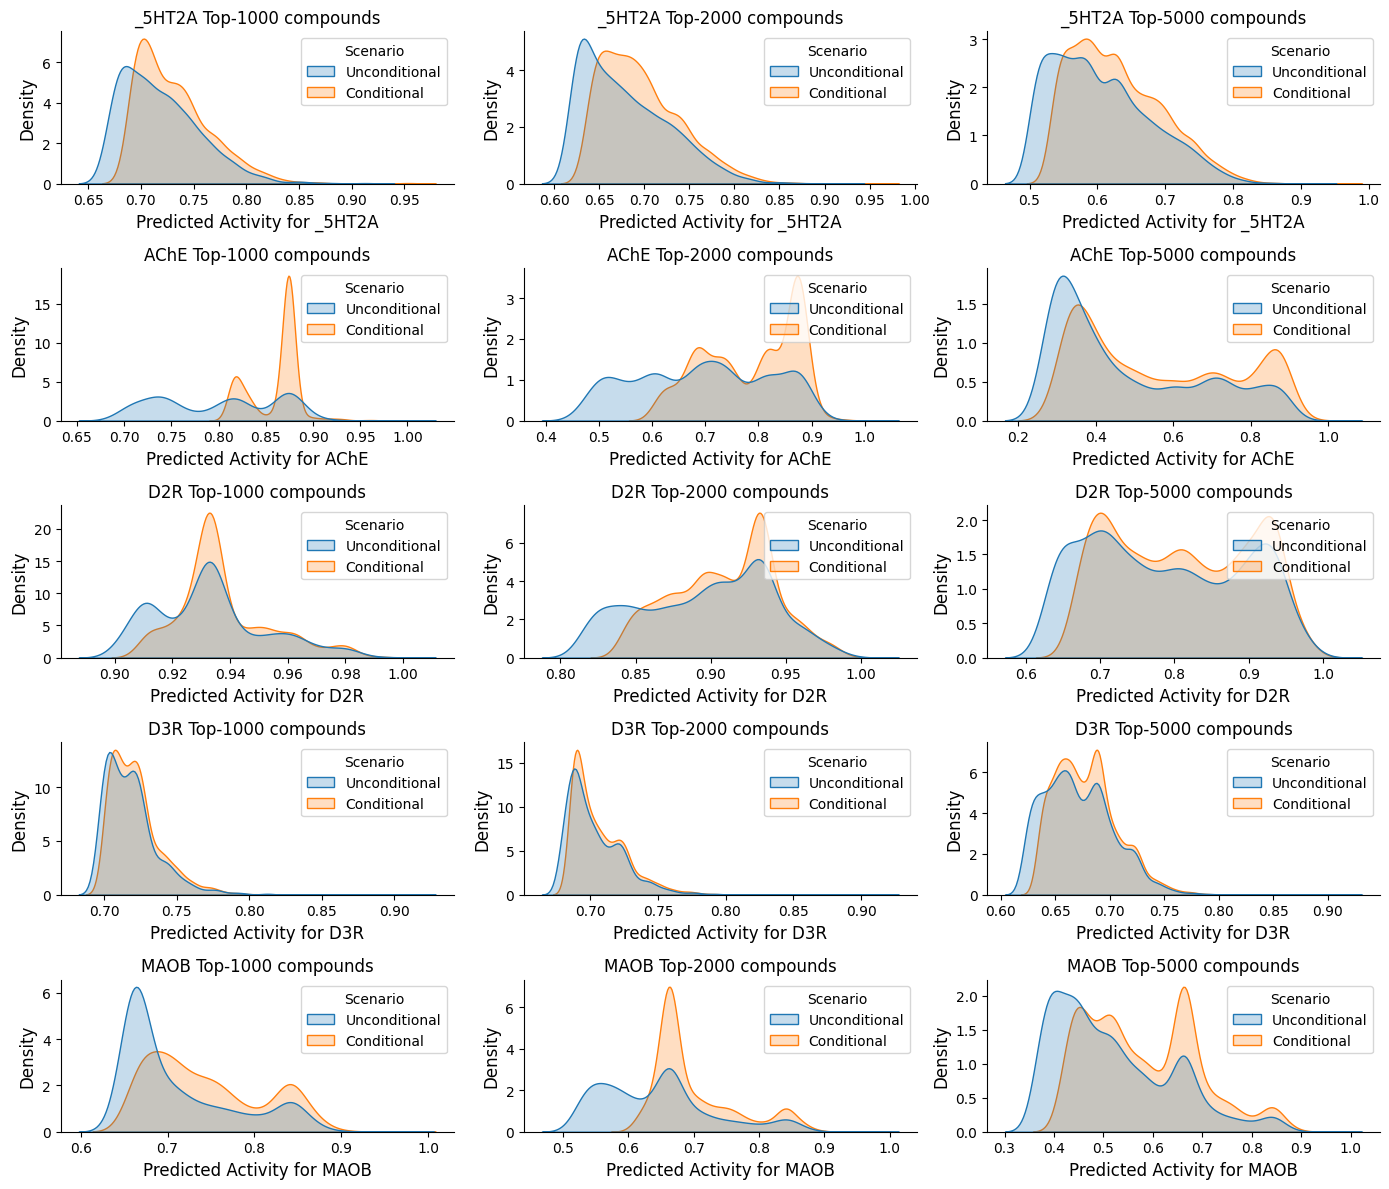

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ACT_TYPE = "Activity" 
# ACT_TYPE = "pIC50"
# ACT_TYPE = "inhibition"

pal=list(sns.color_palette("tab10"))
fig, axes = plt.subplots(len(targets), len(num), figsize=(14, 12))

for i, name in enumerate(targets):
    for j, n in enumerate(num):
        activity_column = f"{name}_{ACT_TYPE}"
        unconditional = dataframes["Unconditional"][
            activity_column
        ].nlargest(n).to_frame().assign(Scenario="Unconditional")

        conditional = dataframes[name][
            activity_column
        ].nlargest(n).to_frame().assign(Scenario="Conditional")

        activities = pd.concat([unconditional, conditional]).reset_index()

        sns.kdeplot(data=activities, x=activity_column, bw_adjust=1, hue='Scenario',ax=axes[i, j], fill=True)
        # sns.histplot(data=activities, x=activity_column, hue='Scenario',ax=axes[i, j], fill=True)

        axes[i, j].set_title('{} Top-{} compounds'.format(name, n), fontsize=12)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].set_ylabel("Density", fontsize=12)
        axes[i, j].set_xlabel(f"Predicted {ACT_TYPE} for {name}", fontsize=12)

    plt.tight_layout()

plt.show()

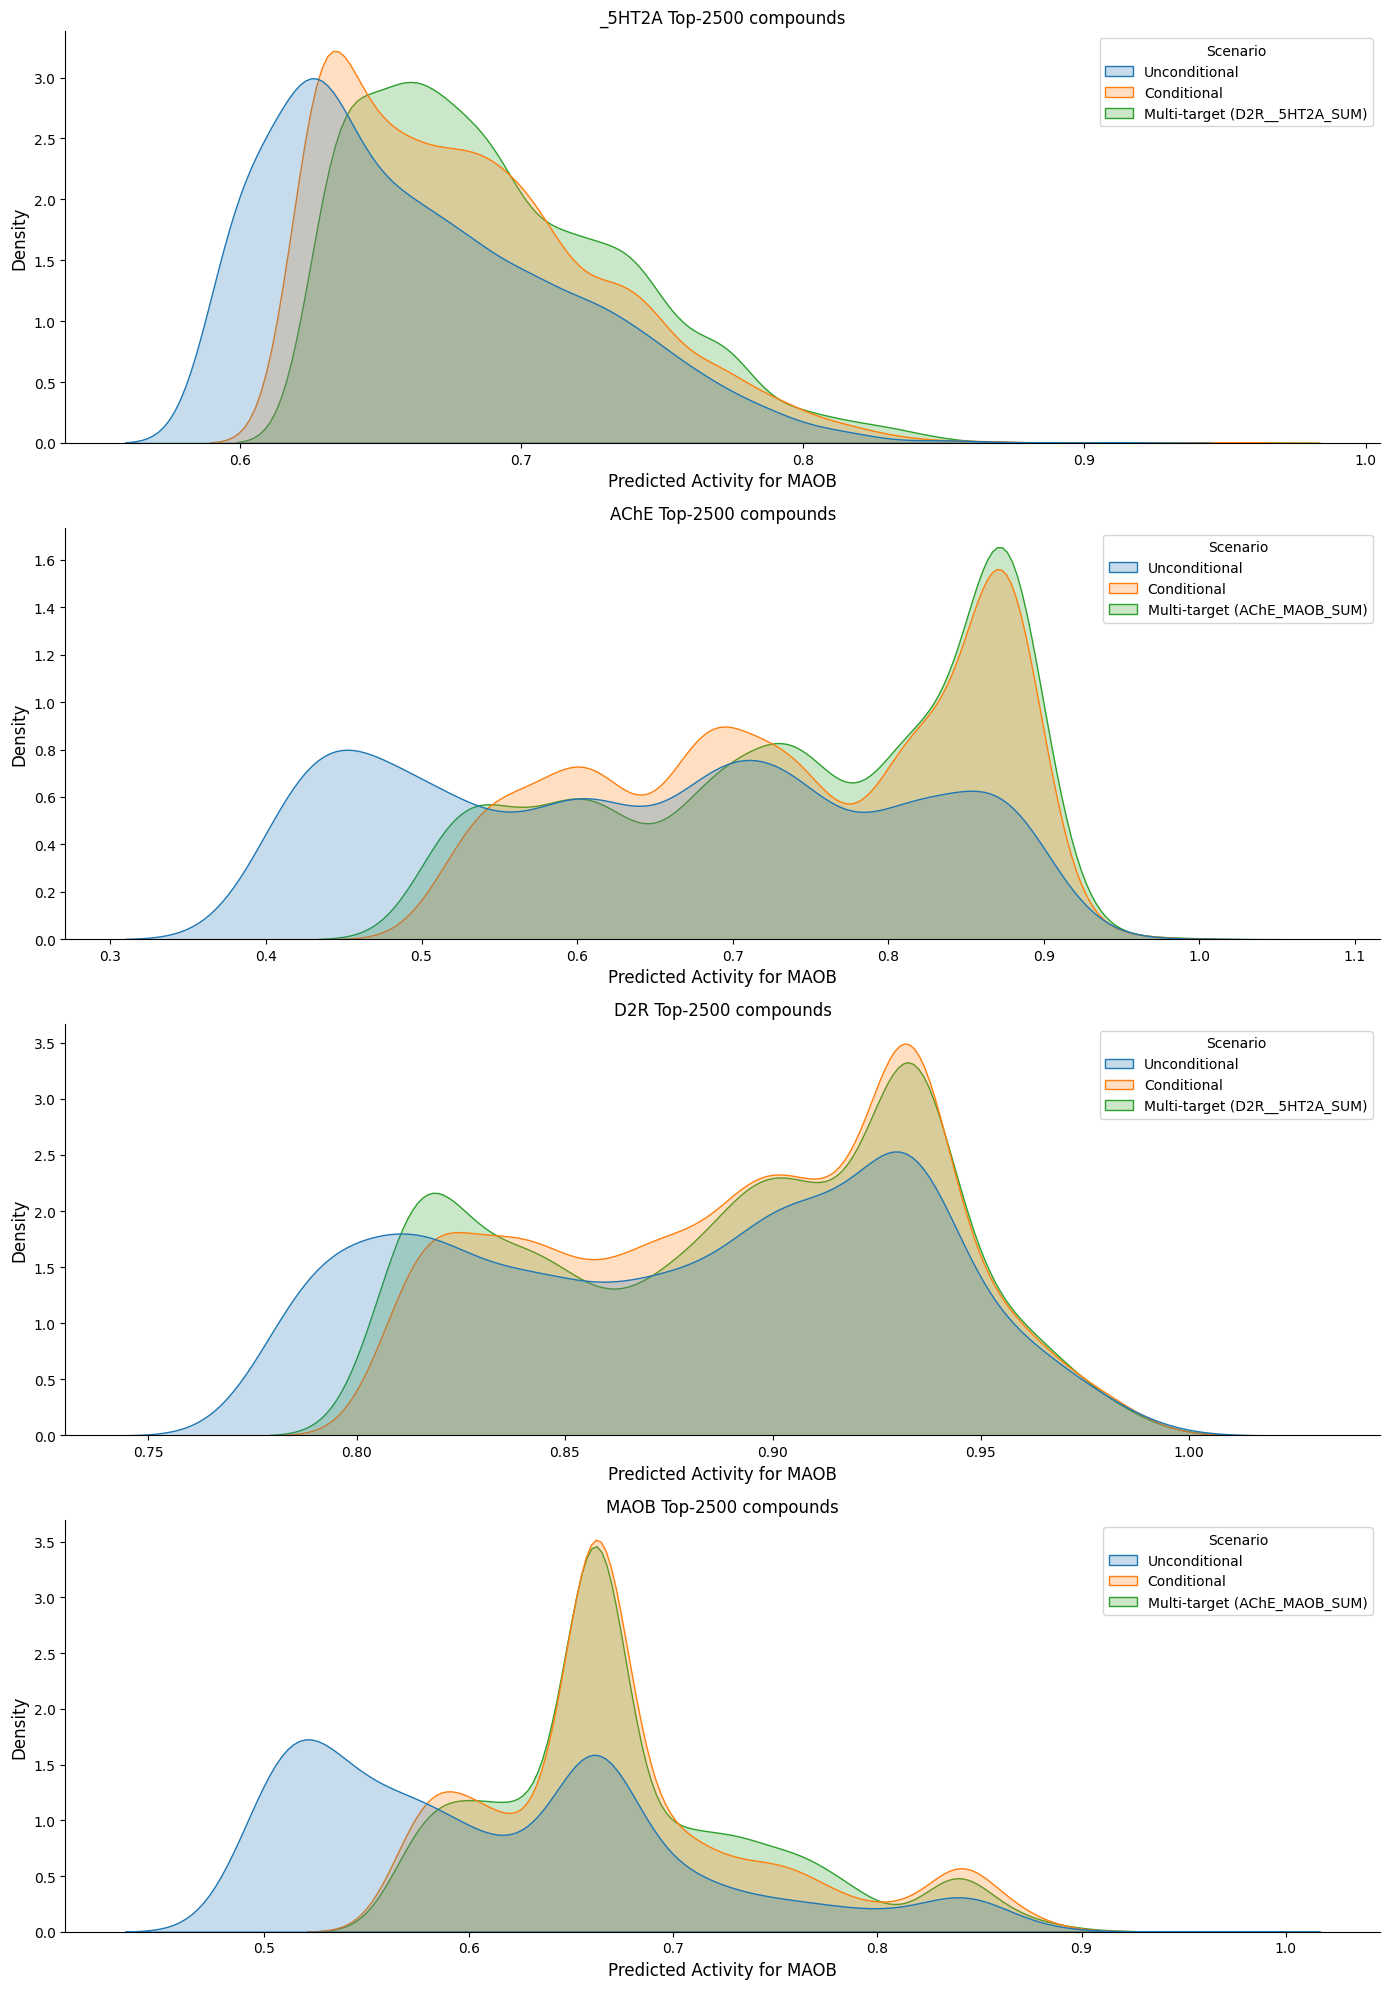

In [5]:
# Plot the multi-target distributions for the top 1000 compounds
agg = "SUM"

multi_targets = [
    f"AChE_MAOB_{agg}",
    f"D2R__5HT2A_{agg}",
    # f"D2R_D3R_{agg}"
]

# targets = ['_5HT2A', 'AChE', 'D2R', 'D3R', 'MAOB']
targets = ['_5HT2A', 'AChE', 'D2R', 'MAOB']
# targets =  ['AChE', 'MAOB']

fig, axes = plt.subplots(len(targets), 1, figsize=(14, 20))
n = 2500

for j, target in enumerate(targets):
    activity_column = f"{target}_{ACT_TYPE}"
    df_list = list()

    unconditional = dataframes["Unconditional"][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Unconditional")

    conditional = dataframes[target][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Conditional")

    df_list.append(unconditional)
    df_list.append(conditional)

    for mts in multi_targets:
        if target not in mts:
            continue
    
        multi_target = dataframes_mt[mts][
            activity_column
        ].nlargest(n).to_frame().assign(Scenario=f'Multi-target ({mts})')

        df_list.append(multi_target)

    activities = pd.concat(df_list).reset_index()

    sns.kdeplot(data=activities, x=activity_column, bw_adjust=1, hue='Scenario',ax=axes[j], fill=True)
    # sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Scenario',ax=axes[j], fill=True)

    axes[j].set_title('{} Top-{} compounds'.format(target, n), fontsize=12)
    axes[j].spines['right'].set_visible(False)
    axes[j].spines['top'].set_visible(False)
    axes[j].set_ylabel("Density", fontsize=12)
    axes[j].set_xlabel(f"Predicted {ACT_TYPE} for {name}", fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
# !pip install ptitprince

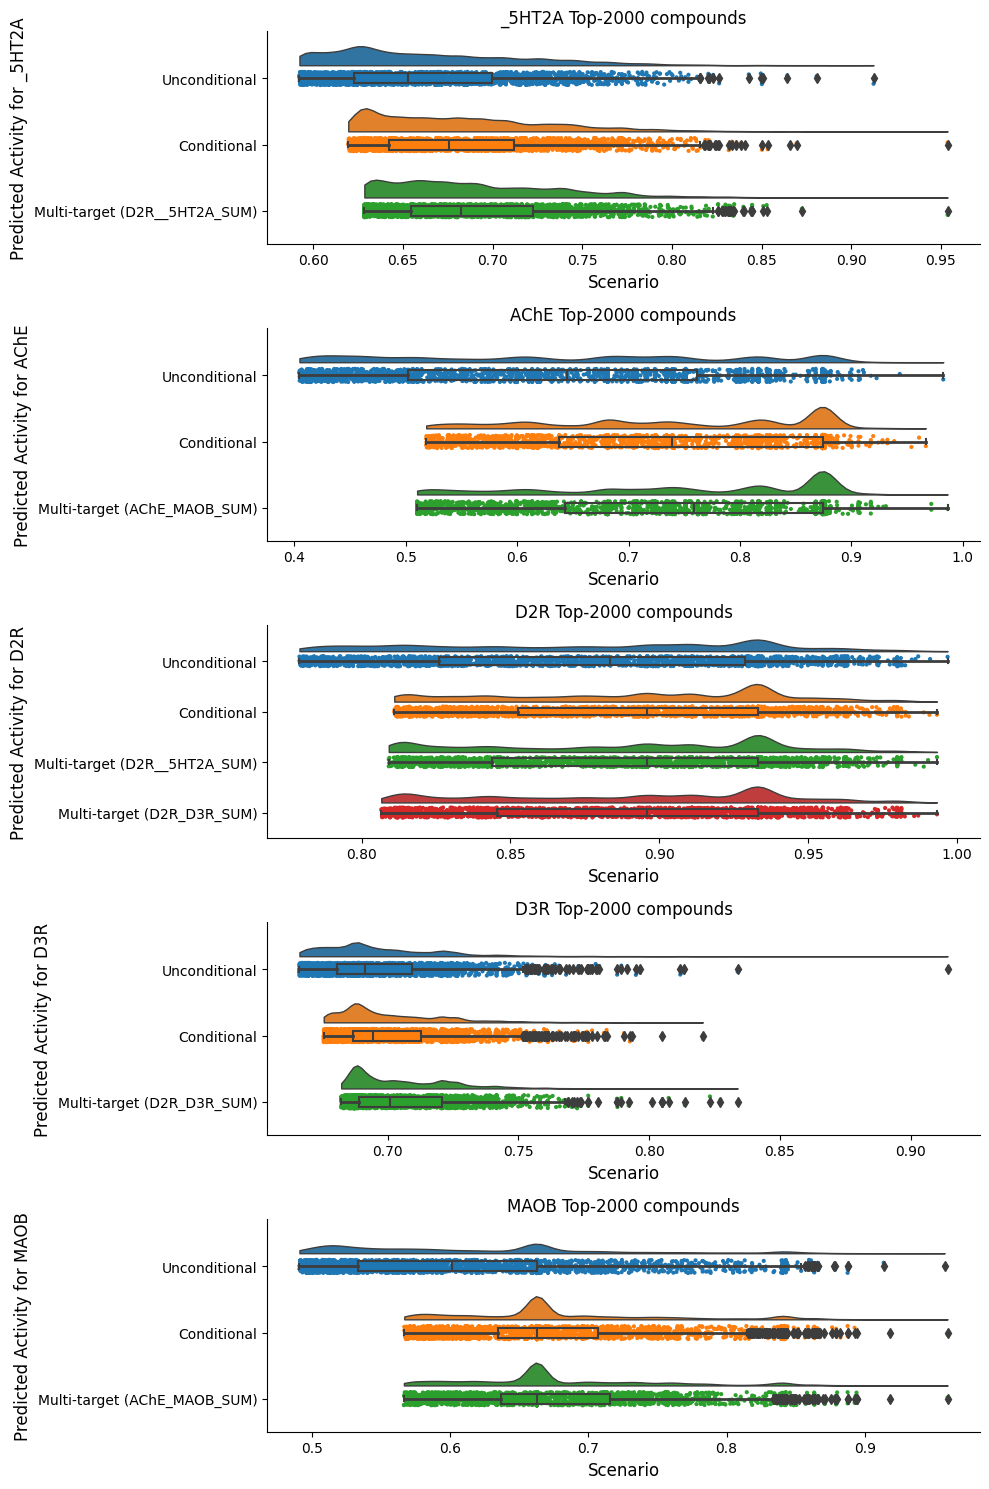

In [9]:
import ptitprince as pt

num = 2000
agg = "SUM"

multi_targets = [
    f"AChE_MAOB_{agg}",
    f"D2R__5HT2A_{agg}",
    f"D2R_D3R_{agg}"
]

targets = ['_5HT2A', 'AChE', 'D2R', 'D3R', 'MAOB']
# targets = ['_5HT2A', 'AChE', 'D2R', 'MAOB']
# targets =  ['AChE', 'MAOB']

fig, axes = plt.subplots(len(targets), figsize=(10, 15))

for i, target in enumerate(targets):
    activity_column = f"{target}_{ACT_TYPE}"
    df_list = list()

    unconditional = dataframes["Unconditional"][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Unconditional")

    conditional = dataframes[target][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Conditional")

    df_list.append(unconditional)
    df_list.append(conditional)

    for mts in multi_targets:
        if target not in mts:
            continue
    
        multi_target = dataframes_mt[mts][
            activity_column
        ].nlargest(n).to_frame().assign(Scenario=f'Multi-target ({mts})')

        df_list.append(multi_target)

    activities = pd.concat(df_list).reset_index()

    pt.RainCloud(data=activities, x='Scenario', y=activity_column, bw=.1, ax=axes[i], palette=pal, orient = "h")

    axes[i].set_title('{} Top-{} compounds'.format(target, num), fontsize=12)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_ylabel(f"Predicted {ACT_TYPE} for {target}", fontsize=12)
    axes[i].set_xlabel("Scenario", fontsize=12)

plt.tight_layout()

plt.show()

In [10]:
for j, target in enumerate(targets):
    activity_column = f"{target}_{ACT_TYPE}"
    df_list = list()

    unconditional = dataframes["Unconditional"][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Unconditional")

    conditional = dataframes[target][
        activity_column
    ].nlargest(n).to_frame().assign(Scenario="Conditional")

    df_list.append(unconditional)
    df_list.append(conditional)

    for mts in multi_targets:
        if target not in mts:
            continue
    
        multi_target = dataframes_mt[mts][
            activity_column
        ].nlargest(n).to_frame().assign(Scenario=f'Multi-target ({mts})')

        df_list.append(multi_target)

    activities = pd.concat(df_list).reset_index()
    pivot = activities.pivot_table(index='Scenario', values=activity_column, aggfunc=[np.mean, np.std])
    format_str = "{:.2%}" if ACT_TYPE == "Activity" else "{:.2f}"

    # print(f"Target: {target}")
    display(pivot.style
                 .format(format_str)
                 .set_caption(f"Top-{n} {target} {ACT_TYPE} statistics")
                 .background_gradient(cmap='Blues', axis=0))

,mean,std
,_5HT2A_Activity,_5HT2A_Activity
Scenario,,
Conditional,68.29%,4.80%
Multi-target (D2R__5HT2A_SUM),69.14%,4.71%
Unconditional,66.43%,5.27%


,mean,std
,AChE_Activity,AChE_Activity
Scenario,,
Conditional,73.96%,11.69%
Multi-target (AChE_MAOB_SUM),74.48%,12.15%
Unconditional,64.21%,15.15%


,mean,std
,D2R_Activity,D2R_Activity
Scenario,,
Conditional,89.23%,4.56%
Multi-target (D2R_D3R_SUM),88.97%,4.79%
Multi-target (D2R__5HT2A_SUM),88.96%,4.79%
Unconditional,87.68%,5.53%


,mean,std
,D3R_Activity,D3R_Activity
Scenario,,
Conditional,70.12%,2.06%
Multi-target (D2R_D3R_SUM),70.61%,2.06%
Unconditional,69.69%,2.25%


,mean,std
,MAOB_Activity,MAOB_Activity
Scenario,,
Conditional,67.78%,7.31%
Multi-target (AChE_MAOB_SUM),67.90%,7.07%
Unconditional,61.60%,9.38%


### Assess mean target modulation

Combination: AChE_MAOB_Activity
Unconditional
AChE
MAOB
AChE_MAOB_SUM
Combination: D2R_D3R_Activity
Unconditional
D2R
D3R
D2R_D3R_SUM
Combination: D2R__5HT2A_Activity
Unconditional
D2R
_5HT2A
D2R__5HT2A_SUM


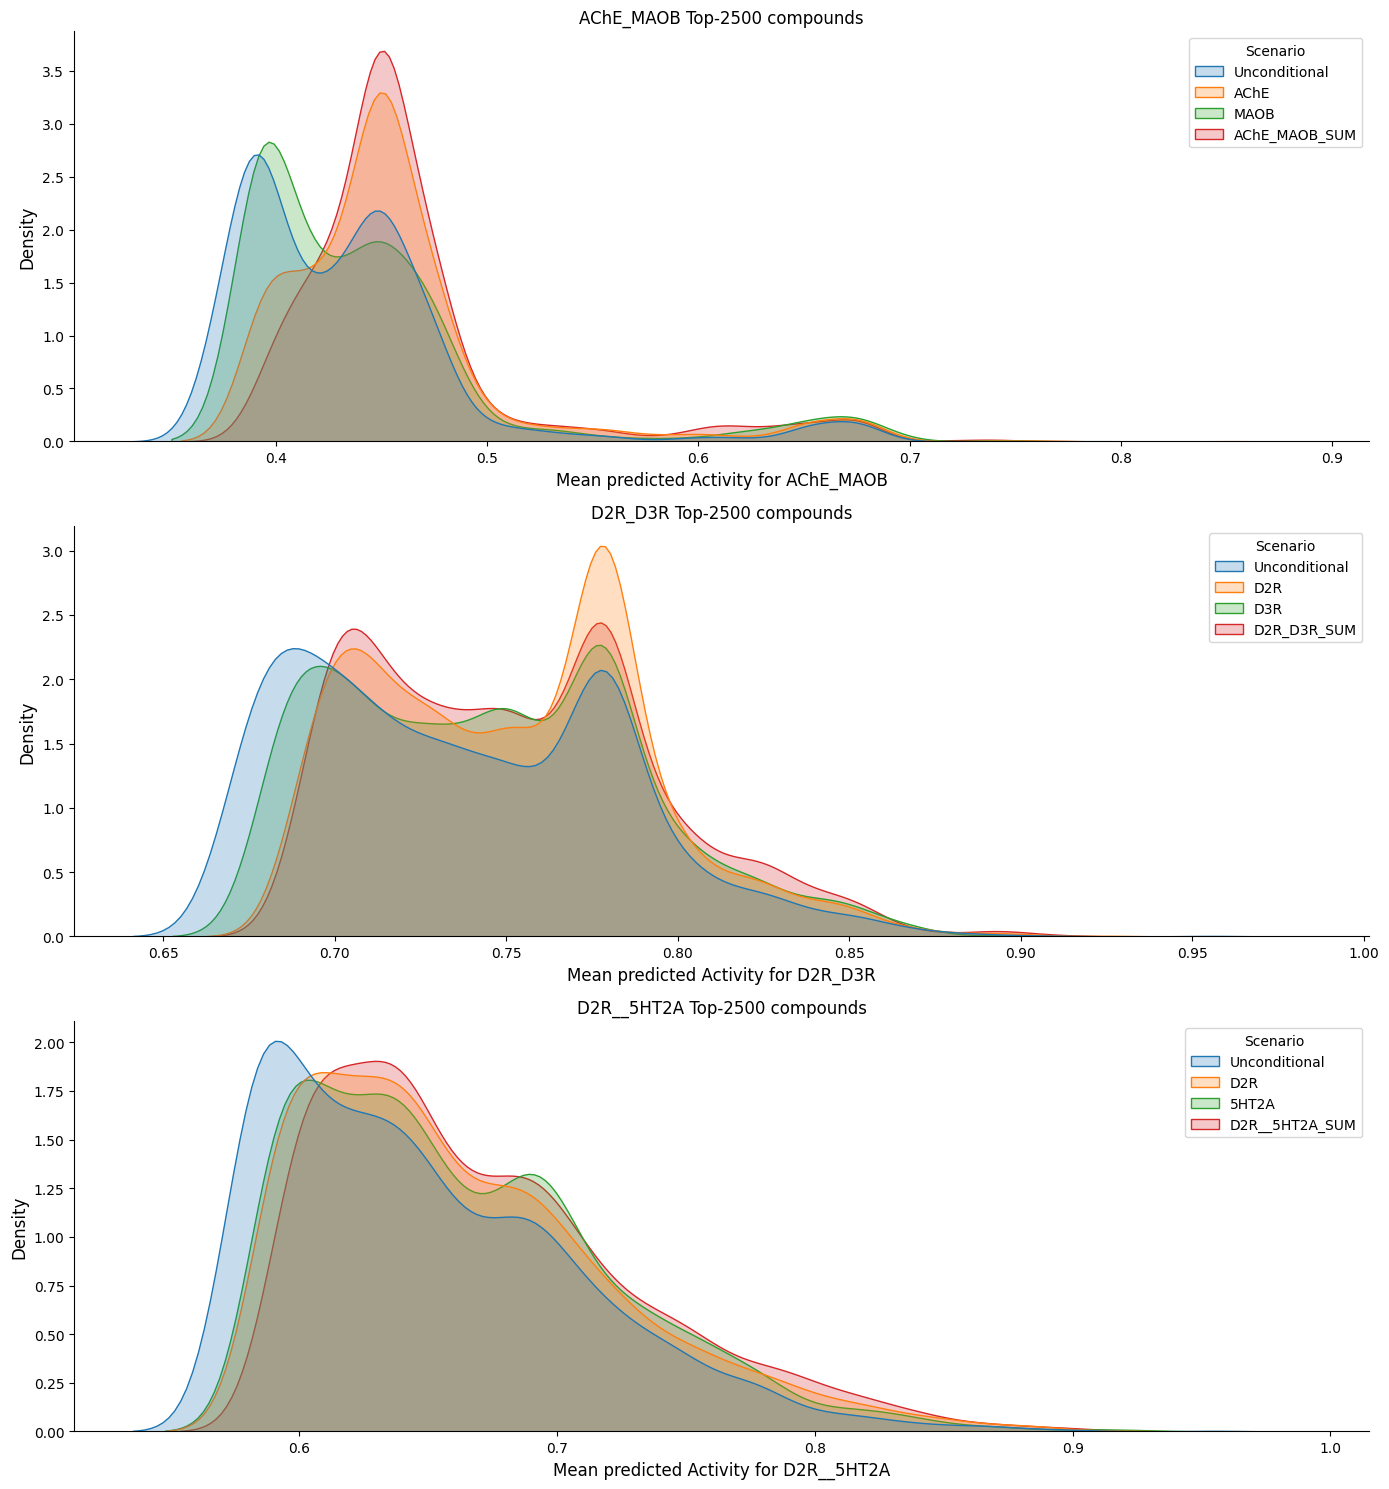

In [11]:
agg = "SUM"  # MEAN, MAX
ACT_TYPE = "Activity"  # pIC50, inhibition
# ACT_TYPE = "inhibition"  # pIC50, inhibition

multitarget_combination = {
    "AChE_MAOB": {
        "generated_molecules": ["Unconditional", "AChE", "MAOB", f"AChE_MAOB_{agg}"],
        # "generated_molecules": ["AChE", "MAOB", f"AChE_MAOB_{agg}"],
        "models": ["AChE", "MAOB"]
    },
    "D2R_D3R": {
        "generated_molecules": ["Unconditional", "D2R", "D3R", f"D2R_D3R_{agg}"],
        # "generated_molecules": [ "D2R", "D3R", f"D2R_D3R_{agg}"],
        "models": ["D2R", "D3R"]
    },
    "D2R__5HT2A": {
        "generated_molecules": ["Unconditional", "D2R", "_5HT2A", f"D2R__5HT2A_{agg}"],
        # "generated_molecules": [ "D2R", "_5HT2A", f"D2R__5HT2A_{agg}"],
        "models": ["D2R", "_5HT2A"]
    },
}

fig, axes = plt.subplots(len(multitarget_combination), 1, figsize=(14, 5 * len(multitarget_combination)))
n = 2500


for j, combination in enumerate(multitarget_combination):
    activity_column = f"{combination}_{ACT_TYPE}"
    df_list = list()
    print(f"Combination: {activity_column}")

    gen_molecules = multitarget_combination[combination]["generated_molecules"]
    for gen_molecule in gen_molecules:
        print(gen_molecule)
        # df = pd.read_csv(f'../generated_molecules/predicted_activity/{gen_molecule}_MTDD.csv')
        df = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{gen_molecule}.csv')
        scenario = gen_molecule[1:] if gen_molecule.startswith("_") else gen_molecule
        df_filtered = df[activity_column].nlargest(n).to_frame().assign(Scenario=scenario)
        df_list.append(df_filtered)

    activities = pd.concat(df_list).reset_index()

    sns.kdeplot(data=activities, x=activity_column, bw_adjust=1, hue='Scenario',ax=axes[j], fill=True)
    # sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Scenario',ax=axes[j], fill=True)

    axes[j].set_title('{} Top-{} compounds'.format(combination, n), fontsize=12)
    axes[j].spines['right'].set_visible(False)
    axes[j].spines['top'].set_visible(False)
    axes[j].set_ylabel("Density", fontsize=12)
    axes[j].set_xlabel(f"Mean predicted {ACT_TYPE} for {combination}", fontsize=12)

plt.tight_layout()
plt.show()

Combination: AChE_MAOB_Activity
Unconditional
AChE
MAOB
AChE_MAOB_SUM
Combination: D2R_D3R_Activity
Unconditional


D2R
D3R
D2R_D3R_SUM
Combination: D2R__5HT2A_Activity
Unconditional
D2R
_5HT2A
D2R__5HT2A_SUM


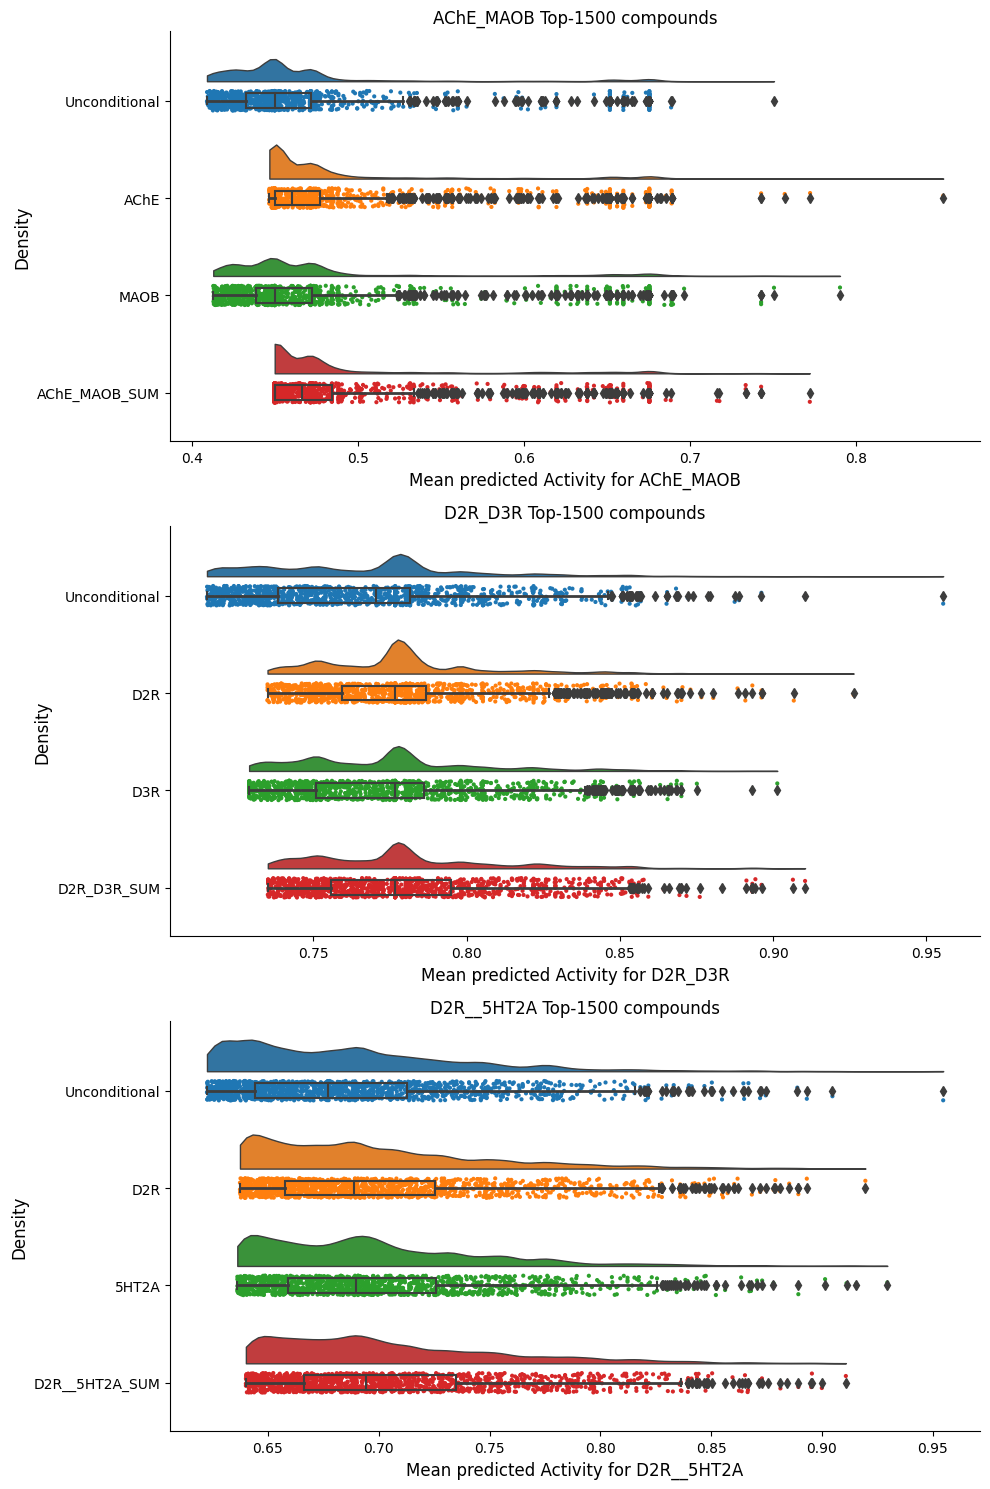

In [22]:
fig, axes = plt.subplots(len(multitarget_combination), 1, figsize=(10, 5 * len(multitarget_combination)))
n = 1500

for j, combination in enumerate(multitarget_combination):
    activity_column = f"{combination}_{ACT_TYPE}"
    df_list = list()
    print(f"Combination: {activity_column}")

    gen_molecules = multitarget_combination[combination]["generated_molecules"]
    for gen_molecule in gen_molecules:
        print(gen_molecule)
        # df = pd.read_csv(f'../generated_molecules/predicted_activity/{gen_molecule}_MTDD.csv')
        df = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{gen_molecule}.csv')
        scenario = gen_molecule[1:] if gen_molecule.startswith("_") else gen_molecule
        df_filtered = df[activity_column].nlargest(n).to_frame().assign(Scenario=scenario)
        df_list.append(df_filtered)

    activities = pd.concat(df_list).reset_index()

    pt.RainCloud(data=activities, x='Scenario', y=activity_column, bw=.1, ax=axes[j], palette=pal, orient = "h")
    # sns.kdeplot(data=df, x="pred_pXC50", bw_adjust=1, hue='Scenario',ax=axes[j], fill=True)

    axes[j].set_title('{} Top-{} compounds'.format(combination, n), fontsize=12)
    axes[j].spines['right'].set_visible(False)
    axes[j].spines['top'].set_visible(False)
    axes[j].set_ylabel("Density", fontsize=12)
    axes[j].set_xlabel(f"Mean predicted {ACT_TYPE} for {combination}", fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
for j, combination in enumerate(multitarget_combination):
    activity_column = f"{combination}_{ACT_TYPE}"
    df_list = list()

    gen_molecules = multitarget_combination[combination]["generated_molecules"]
    for gen_molecule in gen_molecules:
        df = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{gen_molecule}.csv')
        scenario = gen_molecule[1:] if gen_molecule.startswith("_") else gen_molecule
        df_filtered = df[activity_column].nlargest(n).to_frame().assign(Scenario=scenario)
        df_list.append(df_filtered)

    activities = pd.concat(df_list).reset_index()
    pivot = activities.pivot_table(index='Scenario', values=activity_column, aggfunc=[np.mean, np.std])
    pivot = pivot.rename(columns={'mean': 'Mean', 'std': 'Std Deviation'})
    pivot = pivot.sort_values(by=('Mean', activity_column), ascending=False)

    format_str = "{:.2%}" if ACT_TYPE == "Activity" else "{:.2f}"
    # print(f"Combination: {combination}")
    display(pivot.style
                 .format(format_str)
                 .set_caption(f"Top-{n} {combination} {ACT_TYPE} statistics")
                 .background_gradient(cmap='Blues', axis=0))

,Mean,Std Deviation
,AChE_MAOB_Activity,AChE_MAOB_Activity
Scenario,,
AChE_MAOB_SUM,48.83%,6.36%
AChE,48.39%,6.16%
MAOB,47.59%,6.94%
Unconditional,46.47%,5.92%


,Mean,Std Deviation
,D2R_D3R_Activity,D2R_D3R_Activity
Scenario,,
D2R_D3R_SUM,77.99%,3.06%
D2R,77.92%,2.77%
D3R,77.45%,3.04%
Unconditional,76.67%,3.37%


,Mean,Std Deviation
,D2R__5HT2A_Activity,D2R__5HT2A_Activity
Scenario,,
D2R__5HT2A_SUM,70.61%,5.17%
D2R,69.87%,5.15%
5HT2A,69.85%,4.91%
Unconditional,68.55%,5.04%


In [20]:
# ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols


for j, combination in enumerate(multitarget_combination):
    # print()
    activity_column = f"{combination}_{ACT_TYPE}"
    df_list = list()

    gen_molecules = multitarget_combination[combination]["generated_molecules"]
    for gen_molecule in gen_molecules:
        df = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{gen_molecule}.csv')
        scenario = gen_molecule[1:] if gen_molecule.startswith("_") else gen_molecule
        df_filtered = df[activity_column].nlargest(n).to_frame().assign(Scenario=scenario)
        df_list.append(df_filtered)

    activities = pd.concat(df_list).reset_index()
    model = ols(f'{activity_column} ~ C(Scenario)', data=activities).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"Combination: {combination}")
    display(anova_table)

    # Check if the p-value is significant
    p_value = anova_table['PR(>F)'][0]
    print(f"p-value: {p_value:.8f}")

    if p_value < 0.05:
        print("Significant: Reject the null hypothesis")
    else:
        print("Not significant: Fail to reject the null hypothesis")

    # Check the effect size
    eta_squared = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
    print(f"Effect size: {eta_squared:.8f}")

    # Check the power
    power = 0.8

    # Perform a power analysis
    from statsmodels.stats.power import FTestAnovaPower

    f_test = FTestAnovaPower()
    sample_size = f_test.solve_power(effect_size=eta_squared, alpha=0.05, power=power)

    print(f"Sample size: {sample_size:.2f}")

    # Perform a post-hoc test
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    unique_scenarios = activities['Scenario'].unique()

    posthoc = pairwise_tukeyhsd(
        activities[activity_column], activities['Scenario']
    )

    print(f"Combination: {combination}")
    print(posthoc)

Combination: AChE_MAOB


,sum_sq,df,F,PR(>F)
C(Scenario),3.634138,3.0,257.066225,1.054040e-163
Residual,94.227636,19996.0,NaN,NaN


p-value: 0.00000000
Significant: Reject the null hypothesis
Effect size: 0.03713542
Sample size: 5693.45
Combination: AChE_MAOB
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
         AChE AChE_MAOB_SUM   0.0139  -0.0  0.0104  0.0175   True
         AChE          MAOB  -0.0065   0.0   -0.01  -0.003   True
         AChE Unconditional  -0.0236  -0.0 -0.0271   -0.02   True
AChE_MAOB_SUM          MAOB  -0.0204  -0.0  -0.024 -0.0169   True
AChE_MAOB_SUM Unconditional  -0.0375  -0.0  -0.041  -0.034   True
         MAOB Unconditional  -0.0171  -0.0 -0.0206 -0.0135   True
-----------------------------------------------------------------
Combination: D2R_D3R


,sum_sq,df,F,PR(>F)
C(Scenario),1.410776,3.0,114.984563,7.968986e-74
Residual,81.778759,19996.0,NaN,NaN


p-value: 0.00000000
Significant: Reject the null hypothesis
Effect size: 0.01695858
Sample size: 27293.37
Combination: D2R_D3R
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
        D2R   D2R_D3R_SUM   0.0011 0.8125 -0.0022  0.0044  False
        D2R           D3R  -0.0085    0.0 -0.0118 -0.0052   True
        D2R Unconditional  -0.0198   -0.0 -0.0231 -0.0166   True
D2R_D3R_SUM           D3R  -0.0096   -0.0 -0.0129 -0.0063   True
D2R_D3R_SUM Unconditional   -0.021   -0.0 -0.0243 -0.0177   True
        D3R Unconditional  -0.0114   -0.0 -0.0147 -0.0081   True
----------------------------------------------------------------
Combination: D2R__5HT2A


,sum_sq,df,F,PR(>F)
C(Scenario),1.061743,3.0,70.730339,1.702650e-45
Residual,100.054273,19996.0,NaN,NaN


p-value: 0.00000000
Significant: Reject the null hypothesis
Effect size: 0.01050025
Sample size: 71189.85
Combination: D2R__5HT2A
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
         5HT2A            D2R   0.0002 0.9995 -0.0035  0.0038  False
         5HT2A D2R__5HT2A_SUM   0.0071    0.0  0.0035  0.0108   True
         5HT2A  Unconditional   -0.013   -0.0 -0.0167 -0.0094   True
           D2R D2R__5HT2A_SUM    0.007    0.0  0.0033  0.0106   True
           D2R  Unconditional  -0.0132   -0.0 -0.0168 -0.0095   True
D2R__5HT2A_SUM  Unconditional  -0.0202   -0.0 -0.0238 -0.0165   True
--------------------------------------------------------------------


### Data exploration and visualization

In [20]:
import sys
import torch
from collections import namedtuple

sys.path.append('../cMolGPT/')

from model_auto import Seq2SeqTransformer
from utils import read_delimited_file, read_csv_file
import vocabulary as mv

mol_list0_train = list(read_delimited_file('../data/train.smi'))
mol_list0_test = list(read_delimited_file('../data/test.smi'))

mol_list1, target_list = zip(*read_csv_file('../data/chembl_active_compounds.smi', num_fields=2))
mol_list = mol_list0_train
mol_list.extend(mol_list0_test) 
mol_list.extend(mol_list1)
vocabulary = mv.create_vocabulary(smiles_list=mol_list, tokenizer=mv.SMILESTokenizer())

BATCH_SIZE = 512
SRC_VOCAB_SIZE = len(vocabulary)
TGT_VOCAB_SIZE = len(vocabulary)

EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512

NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = DEVICE

args = namedtuple('args',['nhead'])(nhead=NHEAD)

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, 
                                EMB_SIZE, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE,
                                FFN_HID_DIM, args=args, emb_input_size=7)
transformer = transformer.to(device)
transformer.load_state_dict(torch.load('../models_cMolGPT/finetune.h5'))

<All keys matched successfully>

In [21]:
targets_to_idx = {
    "AChE": 1,
    "D2R": 2,
    # "D3R": 3,
    "_5HT2A": 4,
    "MAOB": 5,
}

target_to_key = {
    "AChE": torch.tensor([1]).to(device),
    "D2R": torch.tensor([2]).to(device),
    # "D3R": torch.tensor([3]).to(device),
    "_5HT2A": torch.tensor([4]).to(device),
    "MAOB": torch.tensor([5]).to(device),
}

target_embedding = dict()

for target in target_to_key:
    embedding = transformer.emb(target_to_key[target])
    target_embedding[target] = embedding

target_embedding["AChE"].shape

torch.Size([1, 512])

In [22]:
# compute the cosine similarity between the target embeddings
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

similarity = dict()

for target1 in target_embedding:
    for target2 in target_embedding:
        similarity[f"{target1}_{target2}"] = cos(target_embedding[target1], target_embedding[target2])

# similarity

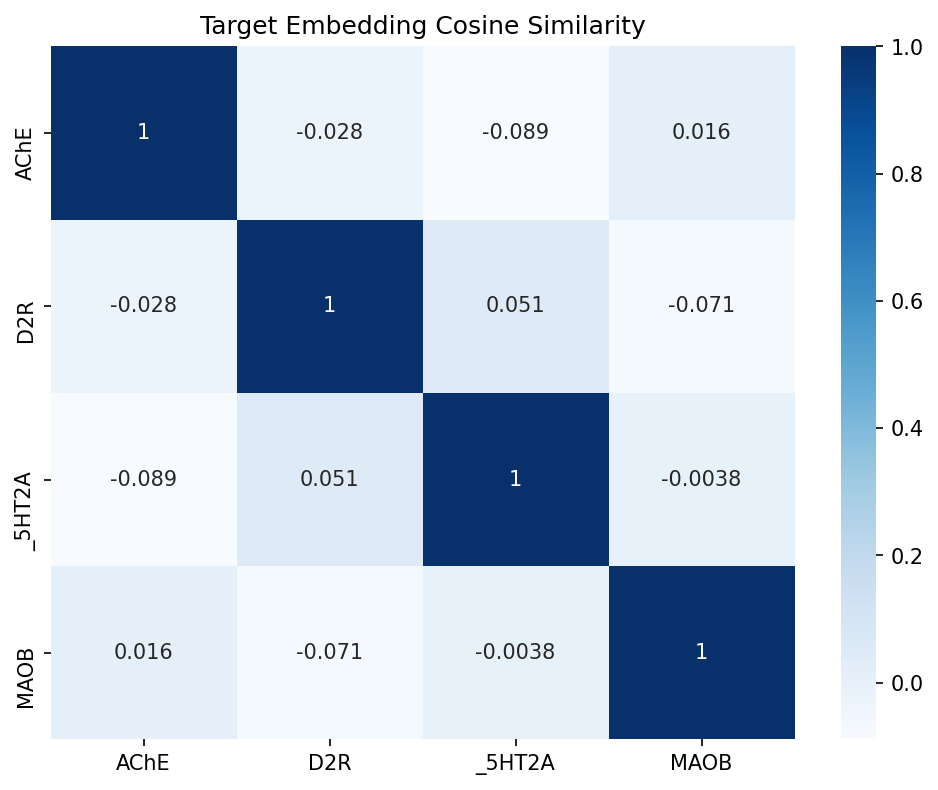

In [23]:
# plot the similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

similarity_matrix = np.zeros((len(target_embedding), len(target_embedding)))

for i, target1 in enumerate(target_embedding):
    for j, target2 in enumerate(target_embedding):
        similarity_matrix[i, j] = similarity[f"{target1}_{target2}"].item()

plt.figure(figsize=(8, 6), dpi=150)

sns.heatmap(
    similarity_matrix, 
    annot=True, cmap='Blues',
    xticklabels=target_embedding.keys(), 
    yticklabels=target_embedding.keys()
)

plt.title('Target Embedding Cosine Similarity')

plt.show()

In [ ]:
# egfr_sequence = """MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEV
# VLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALA
# VLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDF
# QNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGC
# TGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYV
# VTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFK
# NCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAF
# ENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKL
# FGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCN
# LLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVM
# GENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVV
# ALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGS
# GAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMASVDNPHVCRLLGI
# CLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAA
# RNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHRIYTHQSDVWSY
# GVTVWELMTFGSKPYDGIPASEISSILEKGERLPQPPICTIDVYMIMVKCWMIDADSRPK
# FRELIIEFSKMARDPQRYLVIQGDERMHLPSPTDSNFYRALMDEEDMDDVVDADEYLIPQ
# QGFFSSPSTSRTPLLSSLSATSNNSTVACIDRNGLQSCPIKEDSFLQRYSSDPTGALTED
# SIDDTFLPVPEYINQSVPKRPAGSVQNPVYHNQPLNPAPSRDPHYQDPHSTAVGNPEYLN
# TVQPTCVNSTFDSPAHWAQKGSHQISLDNPDYQQDFFPKEAKPNGIFKGSTAENAEYLRV
# APQSSEFIGA"""

# htr1a_sequence = """MDVLSPGQGNNTTSPPAPFETGGNTTGISDVTVSYQVITSLLLGTLIFCAVLGNACVVAA
# IALERSLQNVANYLIGSLAVTDLMVSVLVLPMAALYQVLNKWTLGQVTCDLFIALDVLCC
# TSSILHLCAIALDRYWAITDPIDYVNKRTPRRAAALISLTWLIGFLISIPPMLGWRTPED
# RSDPDACTISKDHGYTIYSTFGAFYIPLLLMLVLYGRIFRAARFRIRKTVKKVEKTGADT
# RHGASPAPQPKKSVNGESGSRNWRLGVESKAGGALCANGAVRQGDDGAALEVIEVHRVGN
# SKEHLPLPSEAGPTPCAPASFERKNERNAEAKRKMALARERKTVKTLGIIMGTFILCWLP
# FFIVALVLPFCESSCHMPTLLGAIINWLGYSNSLLNPVIYAYFNKDFQNAFKKIIKCKFC
# RQ"""

# s1pr1_sequence = """MGPTSVPLVKAHRSSVSDYVNYDIIVRHYNYTGKLNISADKENSIKLTSVVFILICCFII
# LENIFVLLTIWKTKKFHRPMYYFIGNLALSDLLAGVAYTANLLLSGATTYKLTPAQWFLR
# EGSMFVALSASVFSLLAIAIERYITMLKMKLHNGSNNFRLFLLISACWVISLILGGLPIM
# GWNCISALSSCSTVLPLYHKHYILFCTTVFTLLLLSIVILYCRIYSLVRTRSRRLTFRKN
# ISKASRSSEKSLALLKTVIIVLSVFIACWAPLFILLLLDVGCKVKTCDILFRAEYFLVLA
# VLNSGTNPIIYTLTNKEMRRAFIRIMSCCKCPSGDSAGKFKRPIIAGMEFSRSKSDNSSH
# PQKDEGDNPETIMSSGNVNSSS"""

In [ ]:
# from Bio.Seq import Seq
# from Bio.Align import PairwiseAligner

# egfr_seq = Seq(egfr_sequence.replace('\n', ''))
# htr1a_seq = Seq(htr1a_sequence.replace('\n', ''))
# s1pr1_seq = Seq(s1pr1_sequence.replace('\n', ''))

# targets_seq = {
#     "EGFR": egfr_seq,
#     "HTR1A": htr1a_seq,
#     "S1PR1": s1pr1_seq
# }

# egfr_seq

In [ ]:
# aligner = PairwiseAligner()

# for target1 in targets_seq:
#     for target2 in targets_seq:
#         alignments = aligner.align(targets_seq[target1], targets_seq[target2])
#         best_alignment = alignments[0]

#         print(f"Alignment between {target1} and {target2}")
#         # print(best_alignment)

#         # Calculate sequence similarity as the fraction of identical residues
#         similarity = best_alignment.score / len(targets_seq[target1])

#         print(f"Similarity: {similarity:.2f}")

# # plot the similarity matrix
# similarity_matrix = np.zeros((3, 3))

# for i, target1 in enumerate(targets_seq):
#     for j, target2 in enumerate(targets_seq):
#         alignments = aligner.align(targets_seq[target1], targets_seq[target2])
#         best_alignment = alignments[0]

#         similarity_matrix[i, j] = best_alignment.score / len(targets_seq[target1])

# plt.figure(figsize=(8, 6), dpi=150)

# sns.heatmap(
#     similarity_matrix, 
#     annot=True, cmap='Blues',
#     xticklabels=targets_seq.keys(), 
#     yticklabels=targets_seq.keys()
# )

# plt.title('Target Protein Sequence Similarity')

# plt.show()

In [ ]:
# from rdkit import RDLogger

# RDLogger.DisableLog('rdApp.*')

# import lightgbm as lgb
# from process_training_data import get_fp

# # load qsar models for each target
# targets = ["EGFR", "HTR1A", "S1PR1"]

# model = dict()

# for target in targets:
#     model[target] = lgb.Booster(model_file=f'./model/{target}.txt')

# # load active molecules dataset for each target
# active_molecules = dict()

# for target in targets:
#     X = np.load('npy/{}_X.npy'.format(target))
#     y = np.load('npy/{}_y.npy'.format(target))

#     print(X.shape, y.shape)

#     res = pd.DataFrame(X, columns=list(range(len(X[0]))))
#     res['activity'] = y

#     # res_active = res[res['activity'] >= 6.5]

#     active_molecules[target] = res

# # for each model, predict the activity of the active molecules datasets
# predicted_activities = dict()

# for target_model in targets:
#     predicted_activities[target_model] = dict()

#     for target_dataset in targets:
#         X = active_molecules[target_dataset].drop(columns=['activity']).values
#         y = active_molecules[target_dataset]['activity'].values

#         predicted_activities[target_model][target_dataset] = model[target_model].predict(X)

# # plot a scatter plot of the predicted activities for each target
# # each row is a target model, each column is a target dataset
# # the x axis is the predicted activity of the target model, the y axis is the predicted activity of the target dataset
# fig, axes = plt.subplots(3, 3, figsize=(14, 12))

# for i, target_model in enumerate(targets):
#     for j, target_dataset in enumerate(targets):
#         axes[i, j].scatter(
#             predicted_activities[target_model][target_dataset], 
#             active_molecules[target_dataset]['activity'], 
#             # predicted_activities[target_dataset][target_dataset],
#             alpha=0.3,
#             color=pal[i]
#         )

#         axes[i, j].set_title(f'{target_model} model vs {target_dataset} dataset')
#         axes[i, j].set_xlabel(f'{target_model} predicted activity (pXC50)')
#         axes[i, j].set_ylabel(f'{target_dataset} true activity (pXC50)')

#         # calculate the correlation coefficient
#         correlation = np.corrcoef(
#             predicted_activities[target_model][target_dataset], 
#             active_molecules[target_dataset]['activity']
#         )[0, 1]

#         axes[i, j].text(0.5, 0.9, f'Correlation: {correlation:.2f}', 
#                         horizontalalignment='center',
#                         verticalalignment='center',
#                         transform=axes[i, j].transAxes)


# plt.tight_layout()
# plt.show()

In [24]:
active_molecules_smiles = dict()
smiles_target = pd.read_csv("../data/chembl_active_compounds.smi", sep="\t", names=["SMILES", "target"])

targets_to_idx = {
    "AChE": 1,
    "D2R": 2,
    "D3R": 3,
    "_5HT2A": 4,
    "MAOB": 5,
}

for target in targets_to_idx:
    _id = targets_to_idx[target]
    smiles_target_id = smiles_target[smiles_target["target"] == _id]
    active_molecules_smiles[target] = smiles_target_id.sample(150)

active_molecules_smiles

{'AChE':                                                 SMILES  target
 202    COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2       1
 328                            Nc1c2c(nc3ccccc13)CCCC2       1
 227        COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1       1
 190            COc1cccc2c1C=[N+](c1ccc(F)cc1)CC2.[Br-]       1
 7                [O-][S+]1CCN(c2nccc(NCc3ccccc3)n2)CC1       1
 ..                                                 ...     ...
 327  CO[C@H]1C[C@H]2C(=C[C@@H]1OC(=O)c1ccc(Cl)c([N+...       1
 2       C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2       1
 321           COc1cccc([N+]2=Cc3c(cccc3OC)CC2)c1.[Br-]       1
 177                         Cl.Nc1c2c(nc3ccccc13)CCCC2       1
 324             C#CCN1CCC(CCc2cccc(OC(=O)N(C)CC)c2)CC1       1
 
 [150 rows x 2 columns],
 'D2R':                                                 SMILES  target
 338  CC(C)Oc1ccccc1N1CCN(C[C@@H](O)CNC(=O)c2ccc3c(c...       2
 405   COc1cc2c(c(OC)c1OC)[C@@H]1Cc3cc4c(cc3CN1CC2)OCO4       

Text(0.5, 1.0, 'Tanimoto Similarity between Active Molecules Datasets')

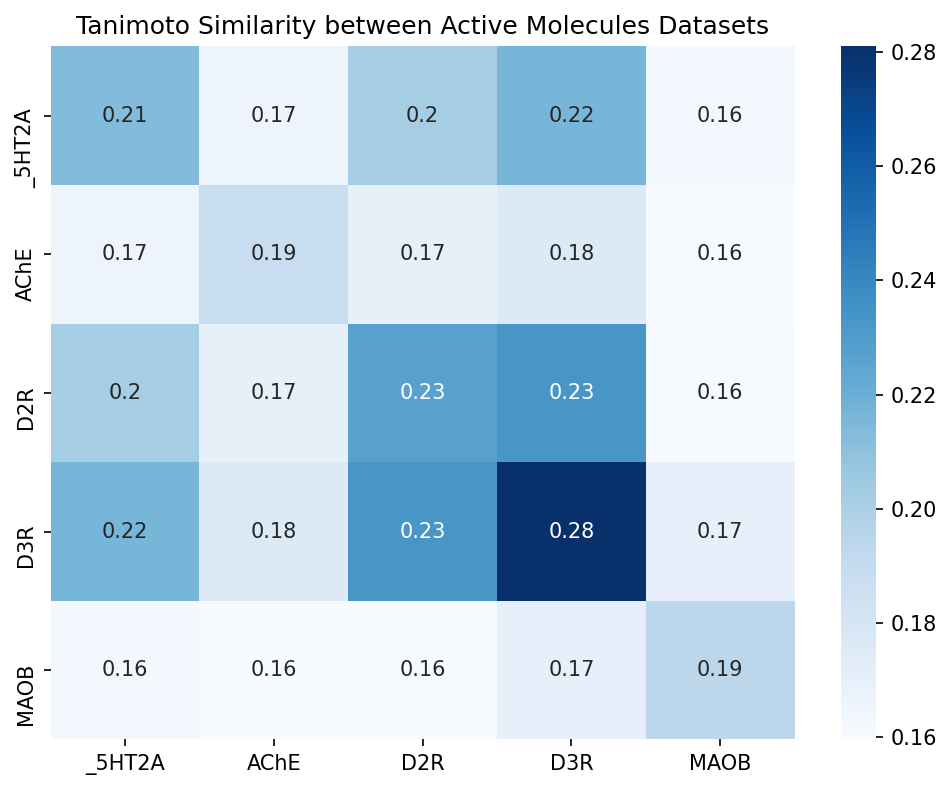

In [25]:
# import tanimoto bulk similarity
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import MolFromSmiles

# for each target, calculate the tanimoto similarity between the active molecules datasets
tanimoto_similarity = dict()

for target1 in targets:
    tanimoto_similarity[target1] = dict()

    for target2 in targets:
        tanimoto_similarity[target1][target2] = list()

        for smiles1 in active_molecules_smiles[target1]['SMILES']:
            mol1 = MolFromSmiles(smiles1)
            fp1 = AllChem.GetMorganFingerprint(mol1, 2)

            for smiles2 in active_molecules_smiles[target2]['SMILES']:
                mol2 = MolFromSmiles(smiles2)
                fp2 = AllChem.GetMorganFingerprint(mol2, 2)

                tanimoto_similarity[target1][target2].append(DataStructs.TanimotoSimilarity(fp1, fp2))

# plot the tanimoto similarity matrix
similarity_matrix = np.zeros((len(targets), len(targets)))

for i, target1 in enumerate(targets):
    for j, target2 in enumerate(targets):
        similarity_matrix[i, j] = np.mean(tanimoto_similarity[target1][target2])

plt.figure(figsize=(8, 6), dpi=150)

sns.heatmap(
    similarity_matrix, 
    annot=True, cmap='Blues',
    xticklabels=targets, 
    yticklabels=targets
)

plt.title('Tanimoto Similarity between Active Molecules Datasets')

#### Tree MAP

In [26]:
all_active_molecules = pd.DataFrame()

targets = ['_5HT2A', 'AChE', 'D2R', 'MAOB']
N = 800

for target in targets:
    mols_df = active_molecules_smiles[target]
    mols_df['target'] = target

    all_active_molecules = pd.concat([all_active_molecules, mols_df])

all_active_molecules

,SMILES,target
974,C/C(=N\Nc1nc2ccccc2n1CCN1CCCC1)c1ccccn1,_5HT2A
829,Cl.NCc1ccc(OCc2ccccc2OC(F)(F)F)cc1,_5HT2A
865,COc1cc2c(c(OC)c1)CN1CCc3cc(OC)c(O)c(OC)c3[C@@H...,_5HT2A
828,Fc1ccc(Nc2nc(NCCN3CCOCC3)nc3[nH]ncc23)cc1,_5HT2A
960,CN(C)/C=N/N=C/c1cn(S(=O)(=O)c2cccc3ccccc23)c2c...,_5HT2A
...,...,...
1141,COc1ccc(C(=O)/C=C/C=C/c2ccc(Cl)cc2)c(O)c1,MAOB
1079,O=C1Nc2ccc(OCc3ccc(Cl)c(Cl)c3)cc2C1=O,MAOB
1028,C[C@@H]1CCCC/C1=N\Nc1nc(-c2ccc([N+](=O)[O-])cc...,MAOB
1241,CCc1c(O)c(=O)ccn1Cc1cc2ccc(OCc3cccc(Cl)c3)cc2o...,MAOB


In [27]:
for i, row in all_active_molecules.iterrows():
    print(row['SMILES'], row['target'])
    print(row)
    break

C/C(=N\Nc1nc2ccccc2n1CCN1CCCC1)c1ccccn1 _5HT2A
SMILES    C/C(=N\Nc1nc2ccccc2n1CCN1CCCC1)c1ccccn1
target                                     _5HT2A
Name: 974, dtype: object


In [28]:
training_mols = pd.read_csv(
    "../data/chembl_active_compounds.smi", sep="\t", names=["SMILES", "target"]
)
training_mols["target"] = training_mols["target"].replace(
    # {1: "EGFR", 2: "HTR1A", 3: "S1PR1"}
    {1: "AChE", 2: "D2R", 3: "D3R", 4: "_5HT2A", 5: "MAOB"}
)

targets = ["AChE", "D2R", "_5HT2A", "MAOB"]
ACT_TYPE = "Activity"

training_mols_ts = training_mols[training_mols["target"].isin(targets)]

for target in targets:
    transformers = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{target}.csv')

    smiles_top_500 = transformers.drop_duplicates(subset="SMILES").nlargest(N, f"{target}_{ACT_TYPE}")

    smiles_top_500['target'] = f"{target} (generated)"
    generated_mols = smiles_top_500[["SMILES", "target"]]

    training_mols_ts = pd.concat([training_mols_ts, generated_mols])

training_mols_ts["target"].value_counts()

AChE (generated)      800
D2R (generated)       800
_5HT2A (generated)    800
MAOB (generated)      800
AChE                  331
D2R                   289
MAOB                  250
_5HT2A                209
Name: target, dtype: int64

In [29]:
# add multi-target generated molecules
agg = "SUM"

multi_targets = [
    (f"AChE_MAOB_{agg}", "AChE", "MAOB"),
    (f"D2R__5HT2A_{agg}", "D2R", "_5HT2A"),
    # (f"D2R_D3R_{agg}", "D2R", "D3R")
]

training_mols_mt = training_mols_ts.copy()

for (mt, t1, t2) in multi_targets:
    transformers = pd.read_csv(f'../generated_molecules/{EPOCHS}-epoch/predicted_activity/{mt}.csv')

    smiles_top_500 = transformers.drop_duplicates(subset="SMILES").nlargest(N, f"{t1}_{t2}_{ACT_TYPE}")

    smiles_top_500['target'] = f"{mt} (generated)"
    generated_mols = smiles_top_500[["SMILES", "target"]]

    training_mols_mt = pd.concat([training_mols_mt, generated_mols])

In [30]:
training_mols_mt["target"].value_counts()

AChE (generated)              800
D2R (generated)               800
_5HT2A (generated)            800
MAOB (generated)              800
AChE_MAOB_SUM (generated)     800
D2R__5HT2A_SUM (generated)    800
AChE                          331
D2R                           289
MAOB                          250
_5HT2A                        209
Name: target, dtype: int64

In [ ]:
# !conda install -c tmap tmap -y
# !pip install faerun mhfp

In [31]:
import numpy as np
import tmap as tm
import scipy.stats as ss
from rdkit.Chem import AllChem
from mhfp.encoder import MHFPEncoder
from faerun import Faerun
from matplotlib.colors import ListedColormap


filter_types = [
    "AChE",
    "MAOB",
    "AChE (generated)",
    "MAOB (generated)",
    "AChE_MAOB_SUM (generated)",
    # "D2R",
    # "_5HT2A",
    # "D2R (generated)",
    # "_5HT2A (generated)",
    # "D2R__5HT2A_SUM (generated)",
]

colors = {
    "AChE": "lightgreen",
    "AChE (generated)": "darkgreen",
    "D2R": "orange",
    "D2R (generated)": "darkorange",
    "_5HT2A": "blue",
    "_5HT2A (generated)": "darkblue",
    "MAOB": "#ff9a98", # "lightred",
    "MAOB (generated)": "darkred",
    "AChE_MAOB_SUM (generated)": "yellow",
    "D2R__5HT2A_SUM (generated)": "brown",
}

def main():
    """ Main funciton """
    # df = all_active_molecules
    df = training_mols_mt.query("target in @filter_types")

    enc = MHFPEncoder(1024)
    lf = tm.LSHForest(1024, 64)

    fps = []
    hac = []
    c_frac = []
    ring_atom_frac = []
    largest_ring_size = []

    for i, row in df.iterrows():
        if i != 0 and i % 1000 == 0:
            print(f"{i / len(df):0.2%} done")
        mol = AllChem.MolFromSmiles(row["SMILES"])
        atoms = mol.GetAtoms()
        size = mol.GetNumHeavyAtoms()
        n_c = 0
        n_ring_atoms = 0
        for atom in atoms:
            if atom.IsInRing():
                n_ring_atoms += 1
            if atom.GetSymbol().lower() == "c":
                n_c += 1

        c_frac.append(n_c / size)
        ring_atom_frac.append(n_ring_atoms / size)
        sssr = AllChem.GetSymmSSSR(mol)
        if len(sssr) > 0:
            largest_ring_size.append(max([len(s) for s in sssr]))
        else:
            largest_ring_size.append(0)
        hac.append(size)
        fps.append(tm.VectorUint(enc.encode_mol(mol)))

    lf.batch_add(fps)
    lf.index()

    c_frak_ranked = ss.rankdata(np.array(c_frac) / max(c_frac)) / len(c_frac)

    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 26
    cfg.mmm_repeats = 2
    cfg.sl_extra_scaling_steps = 5
    cfg.k = 20
    cfg.sl_scaling_type = tm.RelativeToAvgLength
    x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)

    type_labels, type_data = Faerun.create_categories(df["target"])

    cmap = ListedColormap([colors[t[1]] for t in type_labels])

    f = Faerun(view="front", coords=False)
    f.add_scatter(
        "np_atlas",
        {
            "x": x,
            "y": y,
            "c": [
                type_data,
            ],
            "labels": df["SMILES"],
        },
        shader="smoothCircle",
        point_scale=2.0,
        max_point_size=20,
        legend_labels=[type_labels],
        categorical=[True],
        colormap=[cmap],
        series_title=[
            "Type",
        ],
        has_legend=True,
    )
    f.add_tree("np_atlas_tree", {"from": s, "to": t}, point_helper="np_atlas")
    f.plot(template="smiles")

main()

771.55% done
134.18% done
301.91% done


[10:40:42] Explicit valence for atom # 8 Na, 3, is greater than permitted


AttributeError: 'NoneType' object has no attribute 'GetAtoms'

In [ ]:
type_labels, type_data = Faerun.create_categories(training_mols["target"])
type_labels